<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment07** #

Name : 이현주

Student # : 20184060

# **1. Plot the training data [1pt]**

- plot the training data points (x,y) with their labels / in colors (blue for label 0 and red for label 1)

Saving data-nonlinear.txt to data-nonlinear (1).txt


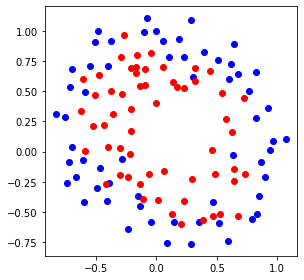

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
from google.colab import files

uploaded = files.upload()

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# **2. Plot the training error with varying regularization parameters[9pt]**

- choose a value for λ1 in such a way that over-fitting is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in red color) [3pt]
- choose a value for λ2 in such a way that just-right is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in green color) [3pt]
- choose a value for λ3​ in such a way that under-fitting is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure

In [0]:
X = pointX #전체 x
y = np.array(pointY,dtype=float)
label = np.array(label,dtype=float)
# print(len(y))

In [0]:
def g_function(X, y, theta, it, i):
  return  (theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i] + theta[3][it]*X[i]*X[i] +
          theta[4][it]*X[i]*y[i] + theta[5][it]*y[i]*y[i] + theta[6][it]*X[i]*X[i]*X[i] + theta[7][it]*X[i]*X[i]*y[i] +
          theta[8][it]*X[i]*y[i]*y[i] + theta[9][it]*y[i]*y[i]*y[i] + theta[10][it]*X[i]*X[i]*X[i]*X[i] + theta[11][it]*X[i]*X[i]*X[i]*y[i] +
          theta[12][it]*X[i]*X[i]*y[i]*y[i] + theta[13][it]*X[i]*y[i]*y[i]*y[i] + theta[14][it]*y[i]*y[i]*y[i]*y[i] 
          #  + theta[15][it]*X[i]*X[i]*X[i]*X[i]*X[i]
           )

In [0]:
def gradient_descent(X,y,label,theta,learning_rate=0.001,iterations=30000):
    
    m = len(y)

    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,15))
    for it in range(iterations):
        pred = 0

        pred0 = 0
        pred1 = 0
        pred2 = 0
        pred3 = 0
        pred4 = 0
        pred5 = 0
        pred6 = 0
        pred7 = 0
        pred8 = 0
        pred9 = 0
        pred10 = 0
        pred11 = 0
        pred12 = 0
        pred13 = 0
        pred14 = 0
        # pred15 = 0

        for i in range(0, m):
          # print(i)
          #cost 함수
          pred = pred + ((-1)*label[i]*math.log(1/(1 + math.exp((-1)*g_function(X, y, theta, it, i))))-((1-label[i])*math.log(1 - (-1)*(1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))))))
          
          #  σ(z)   =    (1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i]))))

          #theta함수
          pred0 = pred0 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])
          pred1 = pred1 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]
          pred2 = pred2 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*y[i]
          pred3 = pred3 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]
          pred4 = pred4 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*y[i]
          pred5 = pred5 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*y[i]*y[i]
          pred6 = pred6 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*X[i]
          pred7 = pred7 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*y[i]
          pred8 = pred8 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*y[i]*y[i]
          pred9 = pred9 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*y[i]*y[i]*y[i]
          pred10 = pred10 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*X[i]*X[i]
          pred11 = pred11 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*X[i]*y[i]
          pred12 = pred12 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*y[i]*y[i]
          pred13 = pred13 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*y[i]*y[i]*y[i]
          pred14 = pred14 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*y[i]*y[i]*y[i]*y[i]
          # pred15 = pred15 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*X[i]*X[i]*X[i]
        
        theta[0][it + 1] = theta[0][it] - (1/m)*learning_rate*pred0
        theta[1][it + 1] = theta[1][it] - (1/m)*learning_rate*pred1
        theta[2][it + 1] = theta[2][it] - (1/m)*learning_rate*pred2
        theta[3][it + 1] = theta[3][it] - (1/m)*learning_rate*pred3
        theta[4][it + 1] = theta[4][it] - (1/m)*learning_rate*pred4
        theta[5][it + 1] = theta[5][it] - (1/m)*learning_rate*pred5
        theta[6][it + 1] = theta[6][it] - (1/m)*learning_rate*pred6
        theta[7][it + 1] = theta[7][it] - (1/m)*learning_rate*pred7
        theta[8][it + 1] = theta[8][it] - (1/m)*learning_rate*pred8
        theta[9][it + 1] = theta[9][it] - (1/m)*learning_rate*pred9
        theta[10][it + 1] = theta[10][it] - (1/m)*learning_rate*pred10
        theta[11][it + 1] = theta[11][it] - (1/m)*learning_rate*pred11
        theta[12][it + 1] = theta[12][it] - (1/m)*learning_rate*pred12
        theta[13][it + 1] = theta[13][it] - (1/m)*learning_rate*pred13
        theta[14][it + 1] = theta[14][it] - (1/m)*learning_rate*pred14
        # theta[15][it + 1] = theta[15][it] - (1/m)*learning_rate*pred15

        theta_history[it][0] = theta[0][it]
        theta_history[it][1] = theta[1][it]
        theta_history[it][2] = theta[2][it]
        theta_history[it][3] = theta[3][it]
        theta_history[it][4] = theta[4][it]
        theta_history[it][5] = theta[5][it]
        theta_history[it][6] = theta[6][it]
        theta_history[it][7] = theta[7][it]
        theta_history[it][8] = theta[8][it]
        theta_history[it][9] = theta[9][it]
        theta_history[it][10] = theta[10][it]
        theta_history[it][11] = theta[11][it]
        theta_history[it][12] = theta[12][it]
        theta_history[it][13] = theta[13][it]
        theta_history[it][14] = theta[14][it]
        # theta_history[it][15] = theta[15][it]

        cost_history[it]  = (1/m) * pred
        
    return theta, cost_history, theta_history

In [0]:
lr =0.5
n_iter = 2000

theta = np.zeros((15, n_iter + 1))  
#theta 전부 0으로 초기화
# theta[0][0] = 1.28
# theta[1][0] = 0.56
# theta[2][0] = 1.11
# theta[3][0] = -2.20
# theta[4][0] = -0.92
# theta[5][0] = -1.62
# theta[6][0] = -0.03
# theta[7][0] = -0.36
# theta[8][0] = -0.33
# theta[9][0] = -0.47
# theta[10][0] = -1.67
# theta[11][0] = -0.05
# theta[12][0] = -0.62
# theta[13][0] = -0.26
# theta[14][0] = -1.54

X_b = np.c_[np.ones((len(X),0)),X]
X_b = np.array(X_b,dtype=float)
# print(X_b.shape)
# print(X_b.dtype)
# print(y.dtype)
theta,cost_history,theta_history = gradient_descent(X_b,y,label,theta,lr,n_iter)

In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []
theta2_history = []
theta3_history = []
theta4_history = []
theta5_history = []
theta6_history = []
theta7_history = []
theta8_history = []
theta9_history = []
theta10_history = []
theta11_history = []
theta12_history = []
theta13_history = []
theta14_history = []
# theta15_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])
  theta2_history.append(theta_history[it][2])
  theta3_history.append(theta_history[it][3])
  theta4_history.append(theta_history[it][4])
  theta5_history.append(theta_history[it][5])
  theta6_history.append(theta_history[it][6])
  theta7_history.append(theta_history[it][7])
  theta8_history.append(theta_history[it][8])
  theta9_history.append(theta_history[it][9])
  theta10_history.append(theta_history[it][10])
  theta11_history.append(theta_history[it][11])
  theta12_history.append(theta_history[it][12])
  theta13_history.append(theta_history[it][13])
  theta14_history.append(theta_history[it][14])
  # theta15_history.append(theta_history[it][15])

# ax.set_ylabel('Theta')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(n_iter),theta0_history,'b.', color = 'red')
# _=ax.plot(range(n_iter),theta1_history,'b.', color = 'green')
# _=ax.plot(range(n_iter),theta2_history,'b.', color = 'blue')

# for it in range(0, 15):
#   print(theta_history[-1][it])

In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

# n_iter = 50
# cost_history = new_cost(X_b,y,theta,n_iter)

# print(cost_history[-1])

# ax.set_ylabel('J(Theta)')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(n_iter),cost_history,'b.')

In [10]:
%pylab inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [0]:
def sigmoid(z): 
  g = 1 / (1 + np.exp(-z)) 
  
  return g 
  
# print('sigmoid(10) = %s, sigmoid(-10) = %s, sigmoid(0) = %s' % (sigmoid(10), sigmoid(-10), sigmoid(0)))

In [0]:
def mapFeature(X1, X2): 
  degree =  9
  #print(X1.shape) 
  m = np.size(X1) 
  out = np.ones(m) 
  res = [] 
  
  res.append(out) 
  
  for i in np.arange(1, degree + 1): 
    for j in np.arange(0, i + 1): 
      out1 = (X1 ** (i - j)) * (X2 ** j) 
      res.append(out1) 
      
  return np.array(res).T 

data = matrix(data)

X = data[:, 0:2] 
y = data[:, 2] 

X = np.array(X)
y = np.array(y)
      
X_reg = mapFeature(X[:, 0], X[:, 1]) 
# print(X_reg[0:2, :])

In [0]:
import scipy.optimize as op 

def myCostReg(theta, X, y, s_lambda): 
  
  X = matrix(X) 

  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 

  theta_0 = theta[0] 
  theta_j = theta[1:] 

  theta = np.matrix(theta) 
  sum_theta_square = np.sum(theta_j ** 2) 
  predictions = X * theta 
  sig_term = sigmoid(predictions)

  J = 1/m * sum(np.multiply(-y, log(sig_term)) - np.multiply((1 - y), log(1 - sig_term))) + s_lambda / (2 * m) * sum_theta_square 
  
  return J 
  
def myGradientReg(theta, X, y, s_lambda): 
 
  X = matrix(X) 

  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 

  theta_0 = theta[0] 
  theta_j = theta[1:] 
 
  theta = np.matrix(theta) 

  predictions = X * theta 
  sig_term = sigmoid(predictions) 

  errors = (sig_term - y) 

  delta_0 = 1/m * errors.T * X[:, 0] 

  delta = 1/m * errors.T * X[:, 1:]

  regular = s_lambda / m * theta_j 
  delta_j = delta.T + regular 
  grad[0] = delta_0 
  grad[1:] = delta_j.T 
   
  return grad.flatten() 
   
initial_theta = np.zeros((X_reg.shape[1], 1)) 
s_lambda = 1 

Result = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda), method = 'TNC', jac = myGradientReg); 
cost = Result.fun 
theta = Result.x 

theta[0] = theta_history[1500][0]
theta[1] = theta_history[1500][1]
theta[2] = theta_history[1500][2]
theta[3] = theta_history[1500][3]
theta[4] = theta_history[1500][4]
theta[5] = theta_history[1500][5]
theta[6] = theta_history[1500][6]
theta[7] = theta_history[1500][7]
theta[8] = theta_history[1500][8]
theta[9] = theta_history[1500][9]
theta[10] = theta_history[1500][10]
theta[11] = theta_history[1500][11]
theta[12] = theta_history[1500][12]
theta[13] = theta_history[1500][13]
theta[14] = theta_history[1500][14]

In [0]:
def predict(theta, X): 
  m = matrix(X) 
  m, n = X.shape 
  theta = theta.reshape((n, 1)) 
  theta = matrix(theta) 
  p = np.zeros((m, 1)) 
  p = sigmoid(X * theta) >= 0.5; 
  
  return p 

In [0]:
p = predict(theta, X_reg) 

In [0]:
def plotBoundary(theta, X, y): 
  
  if np.size(X, 1) <= 3: 
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1] + 2)]) 
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0]) 
    plot(plot_x, plot_y) 
    plt.legend(('Admitted', 'Not admitted'), loc='upper right') 
  
  else: 

    u = linspace(-1, 1.5, 800) 
    v = linspace(-1, 1.5, 800) 
    z = np.zeros((np.size(u), np.size(v))) 

    for i in np.arange(np.size(u)): 
      for j in np.arange(np.size(v)): 
        z[i, j] = np.sum(mapFeature(u[i], v[j]) * theta) 
        
        z = z.T 

    plt.figure()
    plt.scatter(pointX0, pointY0, c='b')
    plt.scatter(pointX1, pointY1, c='r')
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.contour(u, v, z) 

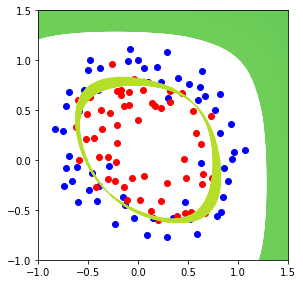

In [19]:
plotBoundary(theta, X_reg, y)

In [18]:
accuracy_history = np.zeros(1500)

for i in range(1500):
  p = predict(theta_history[i], X_reg) 
  accuracy_history[i] = np.mean(double(p == y))

ValueError: ignored

In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

# ax.set_ylabel('accuracy')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(1500),accuracy_history,'r.')

# **3. Display the values of the chosen regularization parameters[3pt]**

- display the value of the chosen λ1 for the demonstration of over-fitting (in red color) [1pt]
- display the value of the chosen λ2​ for the demonstration of just-right (in green color) [1pt]
- display the value of the chosen λ3 for the demonstration of under-fitting (in blue color) [1pt]

# **4. Plot the training accuracy with varying regularization parameters[9pt]**

- plot the training accuracy with the chosen λ1 for over-fitting at every iteration of gradient descent until convergence (in red color) [3pt]
- plot the training accuracy with the chosen λ2​ for just-right at every iteration of gradient descent until convergence (in green color) [3pt]
- plot the training accuracy with the chosen λ3​ for under-fitting at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure

# **5. Display the final training accuracy with varying regularization parameters[3pt]**

- display the final training accuracy obtained with the chosen λ1​ for over-fitting in number (%) at convergence (in red color) [1pt]
- display the final training accuracy obtained with the chosen λ2​ for just-right in number (%) at convergence (in green color) [1pt]
- display the final training accuracy obtained with the chosen λ3​ for under-fitting in number (%) at convergence (in blue color) [1pt]

# **6. Plot the optimal classifier with varying regularization parameters superimposed on the training data[9pt]**

- plot the boundary of the optimal classifier with the chosen λ1​ for over-fitting at convergence (in red color) [3pt]
- plot the boundary of the optimal classifier with the chosen λ2 for just-right at convergence (in green color) [3pt]
- plot the boundary of the optimal classifier with the chosen λ3​ for under-fitting at convergence (in blue color) [3pt]
- the boundary of the classifier is defined by {(x,y)∣σ(g(x,y;θ))=0.5}={(x,y)∣g(x,y;θ)=0}
- the boundaries of the classifiers with different regularization parameters should be presented with the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)
- you can use contour function in python3

# **Machine Learning Assignment07** #

Name : 이현주

Student # : 20184060